In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd
from surprise import Dataset


In [3]:
data = Dataset.load_builtin('ml-100k') 

In [4]:
trainset=data.build_full_trainset()

In [5]:
list(trainset.all_ratings())

[(0, 0, 3.0),
 (0, 528, 4.0),
 (0, 377, 4.0),
 (0, 522, 3.0),
 (0, 431, 5.0),
 (0, 834, 5.0),
 (0, 380, 4.0),
 (0, 329, 4.0),
 (0, 550, 5.0),
 (0, 83, 4.0),
 (0, 632, 2.0),
 (0, 86, 4.0),
 (0, 289, 5.0),
 (0, 363, 3.0),
 (0, 438, 5.0),
 (0, 389, 5.0),
 (0, 649, 4.0),
 (0, 947, 4.0),
 (0, 423, 3.0),
 (0, 291, 3.0),
 (0, 10, 2.0),
 (0, 1006, 4.0),
 (0, 179, 3.0),
 (0, 751, 3.0),
 (0, 487, 3.0),
 (0, 665, 3.0),
 (0, 92, 4.0),
 (0, 512, 5.0),
 (0, 1045, 3.0),
 (0, 672, 4.0),
 (0, 656, 4.0),
 (0, 221, 5.0),
 (0, 432, 2.0),
 (0, 365, 3.0),
 (0, 321, 2.0),
 (0, 466, 4.0),
 (0, 302, 4.0),
 (0, 491, 3.0),
 (0, 521, 1.0),
 (1, 1, 3.0),
 (1, 476, 5.0),
 (1, 305, 1.0),
 (1, 577, 4.0),
 (1, 627, 3.0),
 (1, 746, 5.0),
 (1, 800, 3.0),
 (1, 151, 4.0),
 (1, 114, 4.0),
 (1, 433, 4.0),
 (1, 370, 1.0),
 (1, 970, 5.0),
 (1, 516, 3.0),
 (1, 51, 5.0),
 (1, 527, 1.0),
 (1, 280, 3.0),
 (1, 204, 4.0),
 (1, 364, 3.0),
 (1, 349, 2.0),
 (1, 368, 4.0),
 (1, 77, 2.0),
 (1, 1102, 4.0),
 (1, 1152, 4.0),
 (1, 309, 5.0)

In [6]:
len(list(trainset.all_ratings()))

100000

In [7]:
df = pd.DataFrame(trainset.all_ratings(), columns=["userId", "movieId", "rating"])
df

,userId,movieId,rating
0,0,0,3.0
1,0,528,4.0
2,0,377,4.0
3,0,522,3.0
4,0,431,5.0
...,...,...,...
99995,942,63,5.0
99996,942,141,3.0
99997,942,24,5.0
99998,942,95,4.0


In [8]:
# 製作 user 編碼對應表
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
print(user2user_encoded)
userencoded2user = {i: x for i, x in enumerate(user_ids)}
print(userencoded2user)


{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 119: 119, 120: 120, 121: 121,

In [9]:
# 製作 movie 編碼對應表
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
# 把 user, movie 重新編碼
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

In [10]:
num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

In [11]:

x = df[["user", "movie"]].values
# 電影分數在 0.5 - 5 分之間 正規化到 0 - 1 之間 
y = df["rating"].apply(lambda x: (x - 0.5) / (4.5)).values

# 自己切訓練，驗證跟測試集
train_indices = int(0.75 * df.shape[0])
x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:train_indices],
    x[train_indices:90000],
    x[90000:],
    y[:train_indices],
    y[train_indices:90000],
    y[90000:],
)


In [12]:
train_indices

75000

In [13]:
num_users

943

In [14]:
num_movies

1682

In [15]:
# embedding 層維度設為 50
embedding_size= 50 

# 開始建構模型
# 輸入層
# user id 跟 movie id 只有一個數字，所以 shape 為1
user_id_input = Input(shape=[1], name='user')  
movie_id_input = Input(shape=[1], name='movie')

# 設定 Embedding 層
# input_dim 代表 size
# eg. 把兩個一維向量轉成，兩個二維向量 [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]
user_embedding = Embedding(input_dim=num_users,
                           output_dim=embedding_size, 
                           name='user_embedding')(user_id_input)
movie_embedding = Embedding(input_dim=num_movies,
                            output_dim=embedding_size, 
                            name='movie_embedding')(movie_id_input)

# Reshape the embedding 層
user_vector = Reshape([embedding_size])(user_embedding)
movie_vector = Reshape([embedding_size])(movie_embedding)

# 合併 reshaped embedding layers
concat = Concatenate()([user_vector, movie_vector])

# 多加一層類神經網路（ 256 個神經元）
dense1 = Dense(256)(concat)
# 去掉 20% 神經元
dense = Dropout(0.2)(dense1)
y = Dense(1, activation="sigmoid")(dense) # 利用 sigmoid activation 把輸出轉到 0-1 之間


# 建構模型
model = Model(inputs=[user_id_input, movie_id_input], outputs=y)

model.compile(loss='mse', optimizer='adam')
# Fit the model
history = model.fit(
            x=[x_train[:,0],x_train[:,1]],
            y=y_train,
            batch_size=128, 
            epochs=4,
            validation_data = ([x_val[:,0], x_val[:,1]], y_val),
          )

Train on 75000 samples, validate on 15000 samples
Epoch 1/4
75000/75000 [==============================] - 1s 18us/step - loss: 0.0481 - val_loss: 0.0452
Epoch 2/4
75000/75000 [==============================] - 1s 13us/step - loss: 0.0436 - val_loss: 0.0445
Epoch 3/4
75000/75000 [==============================] - 1s 13us/step - loss: 0.0430 - val_loss: 0.0445
Epoch 4/4
75000/75000 [==============================] - 1s 13us/step - loss: 0.0427 - val_loss: 0.0442


In [16]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
movie (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        47150       user[0][0]                       
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        84100       movie[0][0]                      
__________________________________________________________________________________________________
reshape_1 

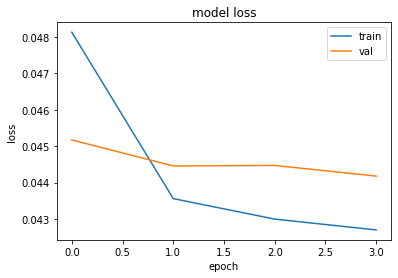

In [17]:
# loss 是前面定義的 mse
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper right")
plt.show()


In [18]:
x_test

array([[402, 410],
       [ 52, 347],
       [624,  36],
       ...,
       [701, 358],
       [  8,  98],
       [ 87, 741]])

In [19]:
y_pred = model.predict([x_test[:,0], x_test[:,1]])
y_true = y_test

In [20]:
y_true

array([1.        , 0.77777778, 1.        , ..., 1.        , 0.11111111,
       0.55555556])

In [21]:
y_true*4.5+0.5

array([5., 4., 5., ..., 5., 1., 3.])

In [29]:
mse = mean_squared_error(y_pred=y_pred*4.5+0.5, y_true=y_true*4.5+0.5)
mse

0.8924666249937802

In [31]:
rmse = np.sqrt(mean_squared_error(y_pred=y_pred*4.5+0.5, y_true=y_true*4.5+0.5))
rmse

0.9447045172929894

In [24]:
# 測試模型
p , a = (model.predict([x_test[:15,0], x_test[:15,1]]) , y_test[:15])
for i in range(len(p)):
    print(f"預測 rating 是 : {float(p[i]*4.5+0.5)} 實際上的 rating 是 : {a[i]*4.5+0.5}")

預測 rating 是 : 1.473266839981079 實際上的 rating 是 : 5.0
預測 rating 是 : 4.728549957275391 實際上的 rating 是 : 4.0
預測 rating 是 : 4.6059889793396 實際上的 rating 是 : 5.0
預測 rating 是 : 3.994302988052368 實際上的 rating 是 : 3.0
預測 rating 是 : 4.2764787673950195 實際上的 rating 是 : 5.0
預測 rating 是 : 3.046522855758667 實際上的 rating 是 : 4.0
預測 rating 是 : 3.709723949432373 實際上的 rating 是 : 4.0
預測 rating 是 : 3.06655216217041 實際上的 rating 是 : 4.0
預測 rating 是 : 2.297825336456299 實際上的 rating 是 : 4.0
預測 rating 是 : 3.1761257648468018 實際上的 rating 是 : 3.0
預測 rating 是 : 3.6632909774780273 實際上的 rating 是 : 5.0
預測 rating 是 : 3.1005704402923584 實際上的 rating 是 : 4.0
預測 rating 是 : 3.7055869102478027 實際上的 rating 是 : 4.0
預測 rating 是 : 2.8662869930267334 實際上的 rating 是 : 3.0
預測 rating 是 : 2.650418758392334 實際上的 rating 是 : 3.0


# 視覺化模型

In [25]:
# 如果還沒安裝graphviz 的話可以用指令直接在Jupyter Notebook安裝
#!pip install graphviz

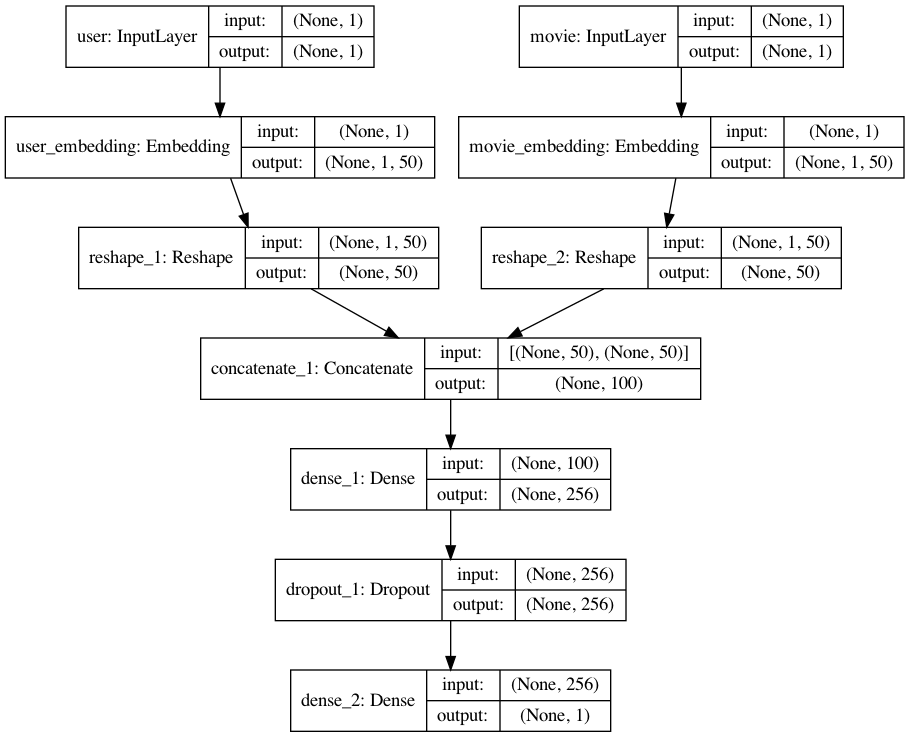

In [26]:
from IPython.display import Image 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')


# 或是用 Net2Vis 視覺化工具
https://viscom.net2vis.uni-ulm.de/dfVHZlgvkukSsLL0BxNxF8MN41GxHAH98o6UwCRICwTtsh78sN

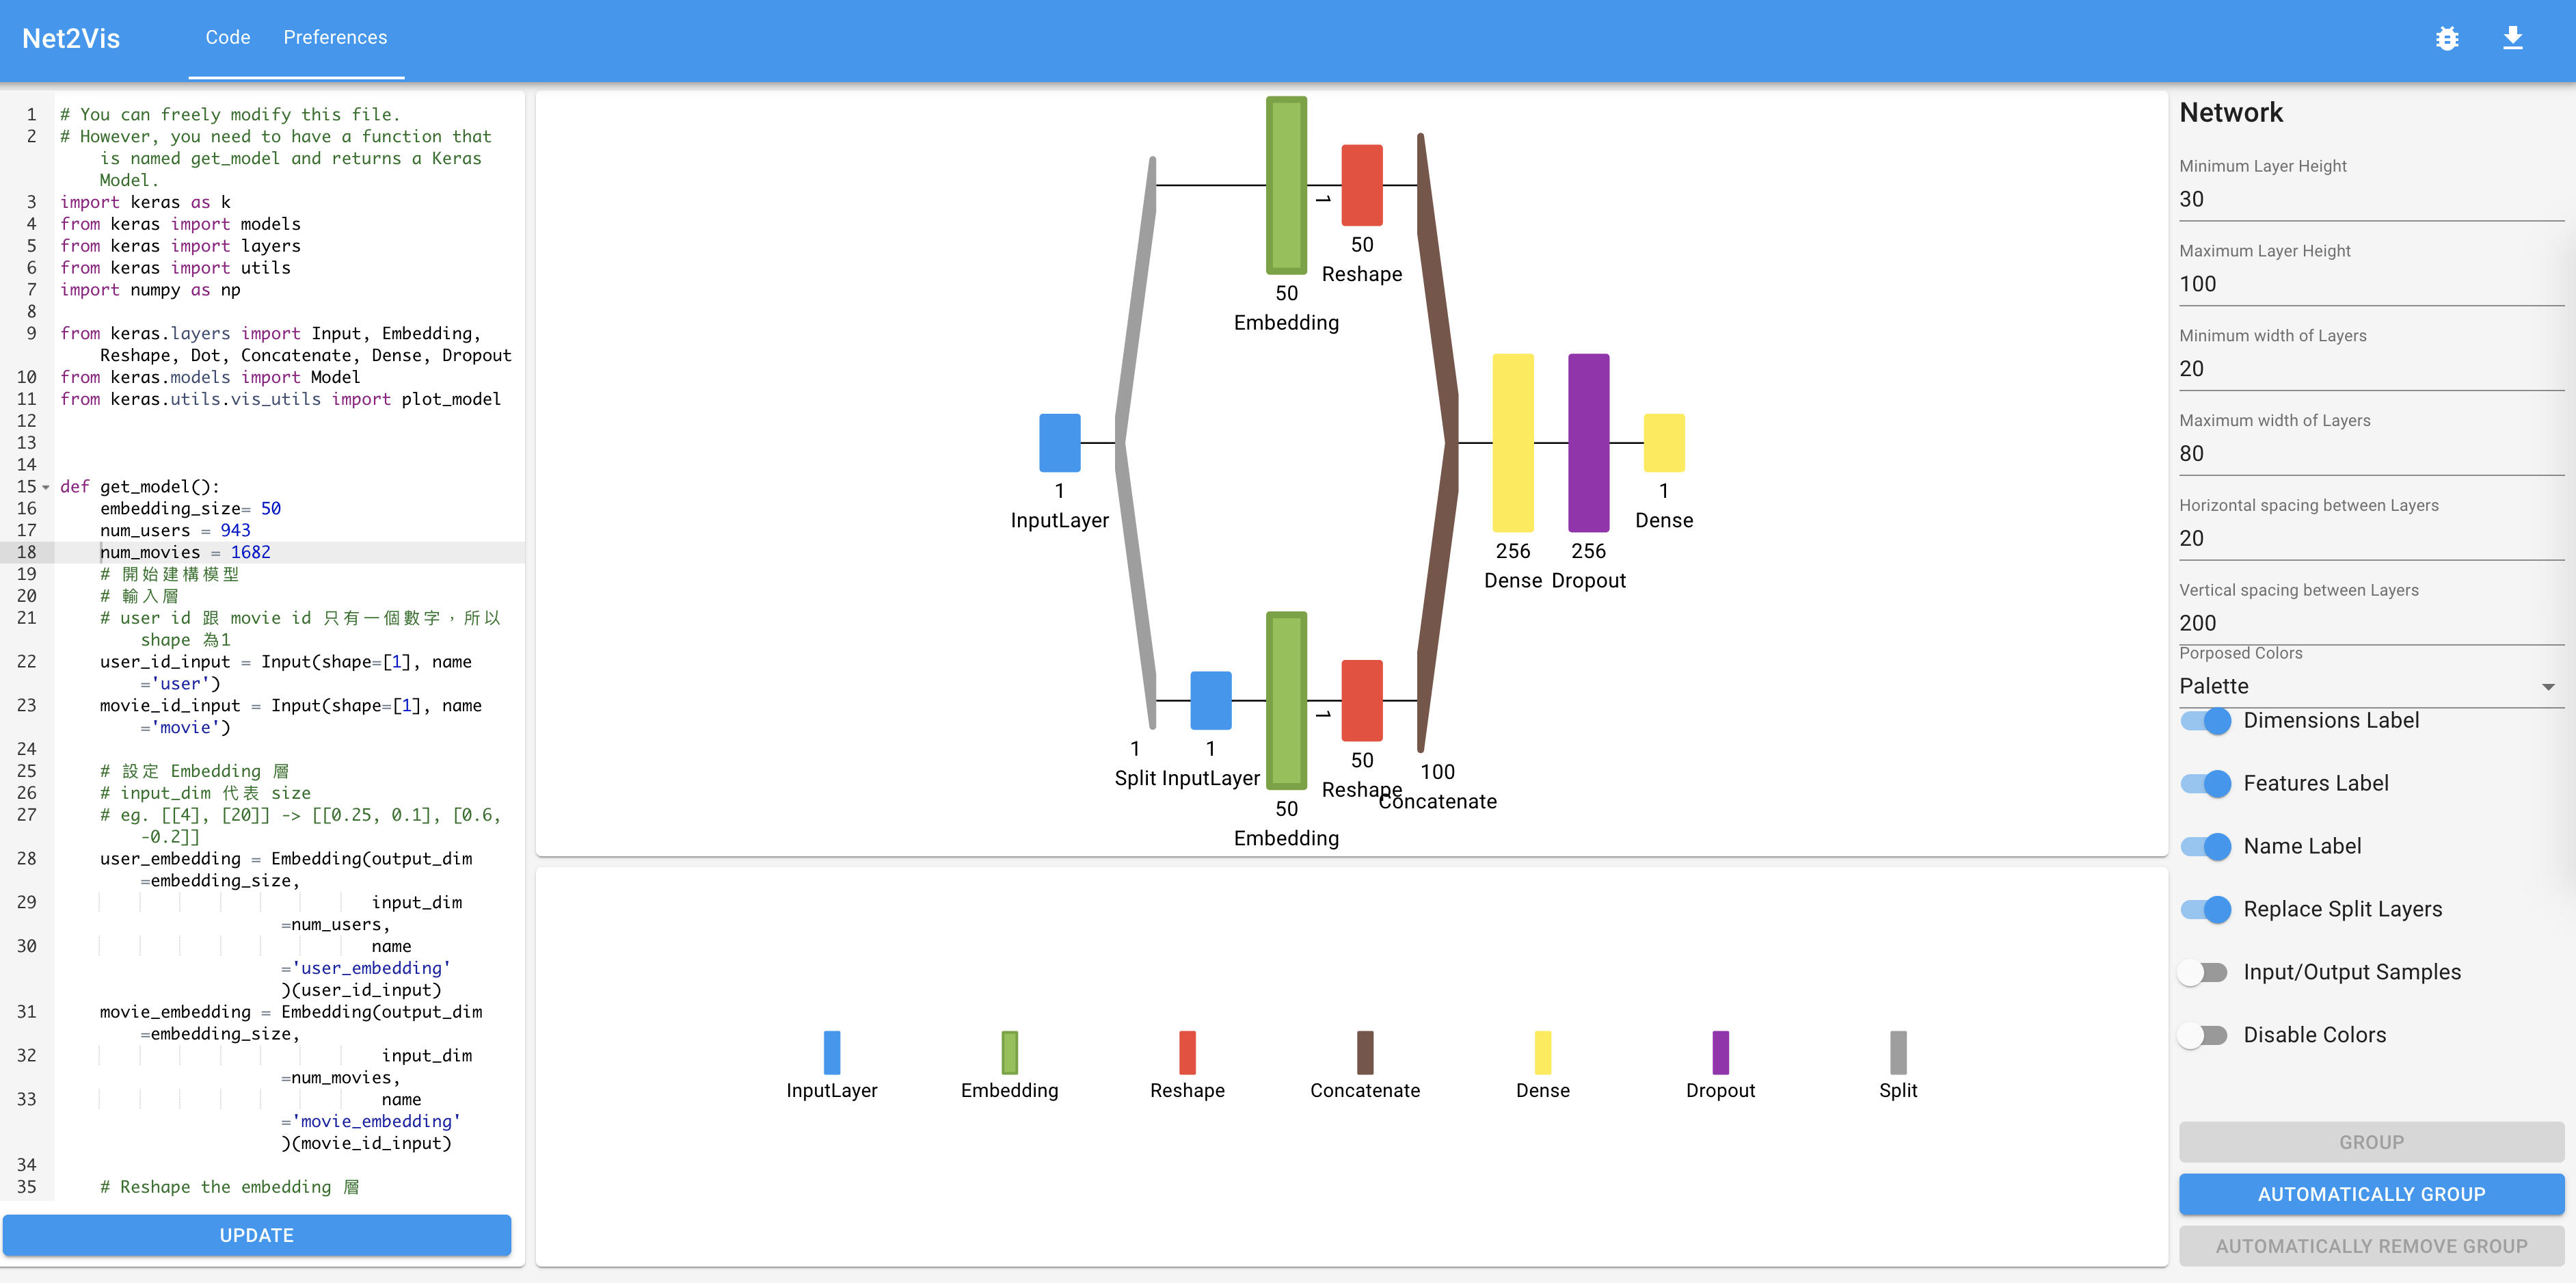

In [28]:
# code for Net2Vis

import keras as k
from keras import models
from keras import layers
from keras import utils
import numpy as np

from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model



def get_model():
    embedding_size= 50 
    num_users = 943
    num_movies = 1682
    # 開始建構模型
    # 輸入層
    # user id 跟 movie id 只有一個數字，所以 shape 為1
    user_id_input = Input(shape=[1], name='user')  
    movie_id_input = Input(shape=[1], name='movie')
    
    # 設定 Embedding 層
    # input_dim 代表 size
    # eg. [[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]
    user_embedding = Embedding(output_dim=embedding_size, 
                               input_dim=num_users,
                               name='user_embedding')(user_id_input)
    movie_embedding = Embedding(output_dim=embedding_size, 
                                input_dim=num_movies,
                                name='movie_embedding')(movie_id_input)
    
    # Reshape the embedding 層
    user_vector = Reshape([embedding_size])(user_embedding)
    movie_vector = Reshape([embedding_size])(movie_embedding)
    
    # 合併 reshaped embedding layers
    concat = Concatenate()([user_vector, movie_vector])
    
    # 多加一層類神經網路（ 256 個神經元）
    dense1 = Dense(256)(concat)
    # 去掉 20% 神經元
    dense = Dropout(0.2)(dense1)
    y = Dense(1, activation="sigmoid")(dense) # 利用 sigmoid activation 把輸出轉到 0-1 之間
    
    
    # 建構模型
    model = Model(inputs=[user_id_input, movie_id_input], outputs=y)
    return model
